# Solve 1D advection-diffusion equation with constant source

We would like to solve the 1D advection-diffusion equation with a constant source as a precursor to solving the advection-diffusion equation for temperature in a molten salt reactor with a heat source that is a function of the neutron fission distribution. Possible boundary conditions for the temperature might be a Dirichlet condition at the inlet with a zero Neumann condition at the outlet, e.g. all heat flux at the outlet is do to advection. I'll have to check and see if that's consistent with the Cammi paper.

## Dirichlet conditions at inlet and outlet

In [1]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff(y,x,2) + diff(y,x) == 1
desolve(de, y, [0, 0, 1, 1])

x

In [ ]:
desolve(de, y, [0, 1, 1, 2])

## Dirichlet condition at inlet and Neumann zero at outlet

In [2]:
f = desolve(de, y)
print(f)

_K1*e^x + _K2 + x + 1


In [ ]:
type(f)

In [ ]:
f(10)

In [ ]:
f(x=10)

In [3]:
fprime = diff(f,x)
print(fprime)

solve(fprime == 0, _K1)

sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

sol2 = solve([g(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

_K1*e^x + 1


In [23]:
sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

sol2 = solve([g(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

_K2 + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
-(e - 1)*e^(-1) + x - e^(x - 1) + 1
x + e^(-1) - e^(x - 1)


In [15]:
hprime = h.diff(x)
hpp = hprime.diff(x)
print(hprime)
print(hpp)

-e^(x - 1) + 1
-e^(x - 1)


In [17]:
-hpp + hprime - 1

0

In [18]:
print(h(x=0).simplify())
print(h(x=0).expand())

-(e - 1)*e^(-1) - e^(-1) + 1
0


In [21]:
print(h(x=1))
print(h(x=1).expand())
print(h(x=1).n())

-(e - 1)*e^(-1) + 1
e^(-1)
0.367879441171442


In [8]:
p = plot(h, (0, 1))

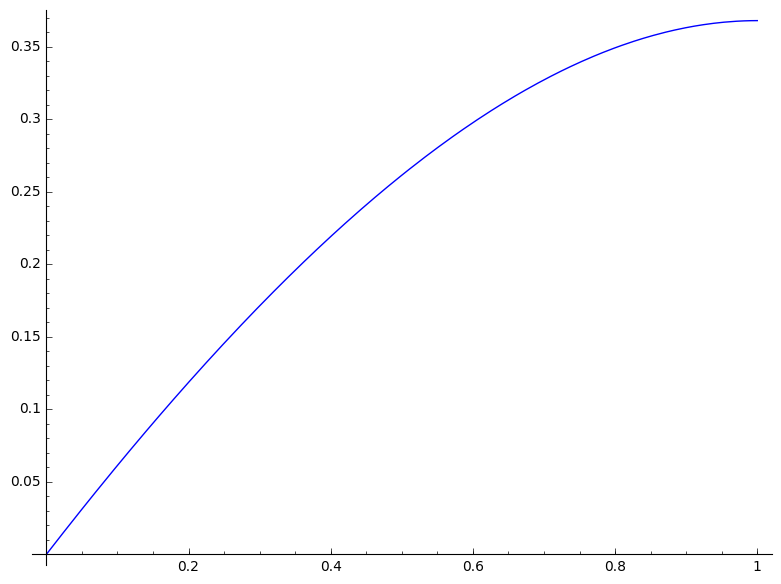

In [9]:
show(p)

# Solve with non-constant diffusion coefficient

In [2]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff((1 + x) * diff(y, x), x) + diff(y,x) == 1
f = desolve(de, y)
print(f)

_K2*x - (x + 1)*log(x + 1) + _K1 + x


In [7]:
fprime = diff(f,x)

sol = solve([fprime(x=1) == 0], _K2)

g = f.subs(sol[0])

sol2 = solve([g(x=0) == 0], _K1)

h = g.subs(sol2[0])
print(h.simplify())
print(h.expand())
hp = diff(h, x)
hpp = diff(hp, x)
print(hp)
print(hpp)
print(h(x=0))
print(hp(x=1))
print(-diff((1 + x) * diff(h, x), x) + diff(h,x) - 1)
print(h(x=1).n())

x*log(2) - (x + 1)*log(x + 1) + x
x*log(2) - x*log(x + 1) + x - log(x + 1)
log(2) - log(x + 1)
-1/(x + 1)
0
0
0
0.306852819440055


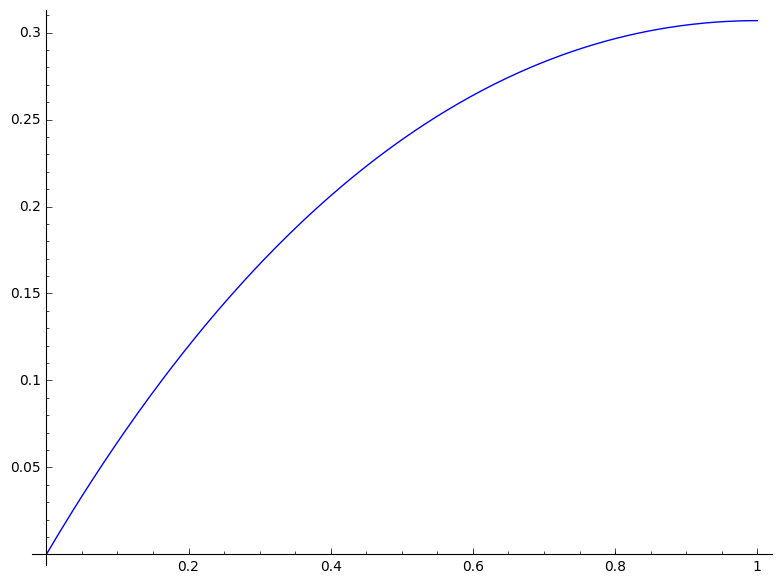

In [6]:
p = plot(h, (0, 1))
show(p)

## Neumann condition at inlet and outlet

In [27]:
sol = solve([fprime(x=1) == 0], _K1)

g = f.subs(sol[0])
print(g)

_K2 + x - e^(x - 1) + 1


In [29]:
gprime = g.diff(x)
print(gprime)
print(gprime(x=1))

-e^(x - 1) + 1
0


As indicated by the cell above and below, it is literally **impossible to impose a Neumann condition at both inlet and outlet** for the advection-diffusion problem because one condition specifies K1, but K2 vanishes after differentiation so it cannot be specified by imposing a Neumann condition. So Riveria must have been smoking some crack when she wrote those two conditions down.

In [25]:
sol2 = solve([gprime(x=0) == 0], _K2)

h = g.subs(sol2[0])
print(h)
print(h.simplify())
print(h.expand())

IndexError: list index out of range

# Advection-diffusion equation, no source, InletBC

In [8]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff(y,x,2) + diff(y,x) == 0
f = desolve(de, y)
print(f)

_K1*e^x + _K2


In [10]:
fprime = diff(f, x)
print(fprime)
sol = solve(-fprime(x=1) == f(x=1), _K1)
g = f.subs(sol[0])
print(g)

_K1*e^x
-1/2*_K2*e^(x - 1) + _K2


In [16]:
gp = diff(g, x)
sol = solve(gp(x=0) - g(x=0) == -2, _K2)
h = g.subs(sol[0])
print(h)
print(h(x=0).n())
print(h(x=1).n())

-e^(x - 1) + 2
1.63212055882856
1.00000000000000


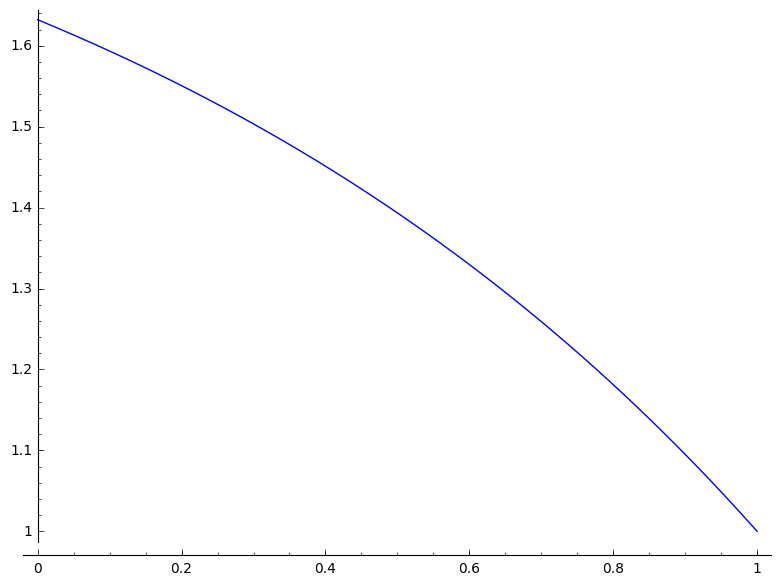

In [15]:
p = plot(h, (0,1))
show(p)

# Advection-diffusion equation, no source, u(0) = 1, -u'(1) = u(1)
### Corresponds to `advection_diffusion_left_diri_one_right_robin_bc.i`

## a = 1

In [17]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff(y,x,2) + diff(y,x) == 0
f = desolve(de, y)
print(f)

_K1*e^x + _K2


In [18]:
fprime = diff(f, x)
print(fprime)
sol = solve(-fprime(x=1) == f(x=1), _K1)
g = f.subs(sol[0])
print(g)

_K1*e^x
-1/2*_K2*e^(x - 1) + _K2


In [19]:
gp = diff(g, x)
sol = solve(g(x=0) == 1, _K2)
h = g.subs(sol[0])
print(h)
print(h(x=0).n())
print(h(x=1).n())

2*e/(2*e - 1) - e^x/(2*e - 1)
1.00000000000000
0.612699836780282


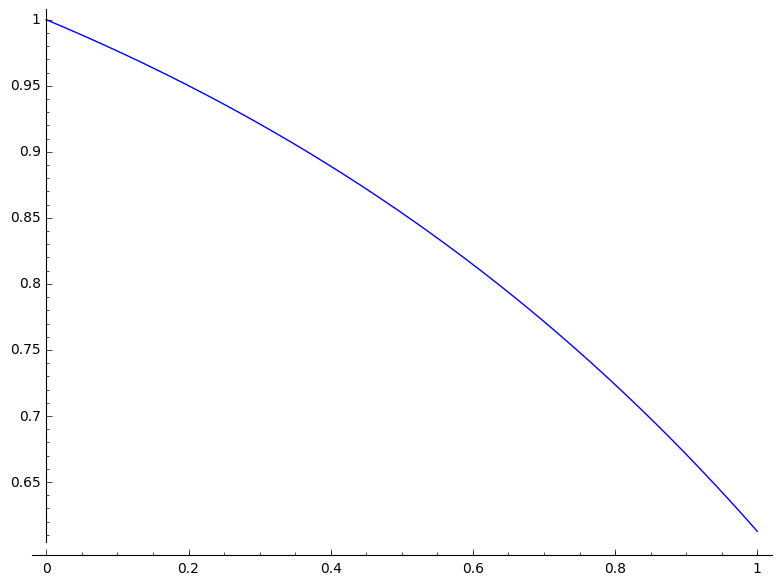

In [20]:
p = plot(h, (0,1))
show(p)

## a = 100

In [21]:
x, _K1, _K2 = var('x _K1 _K2')
y = function('y')(x)
de = -diff(y,x,2) + 100 * diff(y,x) == 0
f = desolve(de, y)
print(f)

_K1*e^(100*x) + _K2


In [22]:
fprime = diff(f, x)
print(fprime)
sol = solve(-fprime(x=1) == f(x=1), _K1)
g = f.subs(sol[0])
print(g)

100*_K1*e^(100*x)
-1/101*_K2*e^(100*x - 100) + _K2


In [23]:
gp = diff(g, x)
sol = solve(g(x=0) == 1, _K2)
h = g.subs(sol[0])
print(h)
print(h(x=0).n())
print(h(x=1).n())

101*e^100/(101*e^100 - 1) - e^(100*x)/(101*e^100 - 1)
1.00000000000000
0.990099009900990


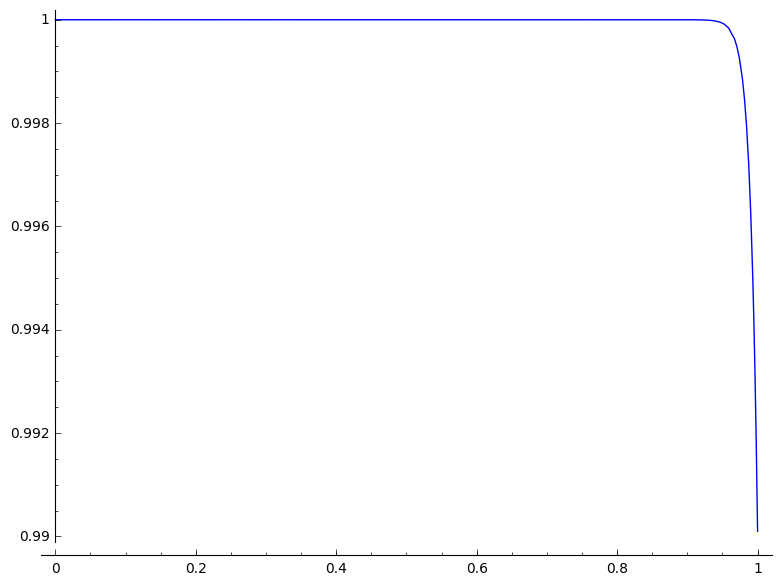

In [24]:
p = plot(h, (0,1))
show(p)

In order to reproduce the analytical solution using Moltres, it is essential to add the InflowBC boundary condition on the inlet boundary for cases where advection is dominant. Here is the Moltres solution without the InflowBC:

![caption](files/without_inflow_bc_component.png)

and here is the Moltres solution with the InflowBC:

![caption](files/with_inflow_bc_component.png)

This undershoot behavior in the former case is what I was observing in my temperature simulations. Glad we are getting an understanding now!

# Scratch

In [ ]:
fprime(x=1)

In [ ]:
expr = (fprime(x=1) - 1) / e
print(expr)

In [ ]:
type(expr)

In [ ]:
type(x)

In [ ]:
x = var('x')
type(x)

In [ ]:
_K1, K1 = var('_K1 K1')

In [ ]:
solve(expr, _K1)